In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


my_model = keras.models.load_model('trained_cats_dogs_model.keras')

train_path = 'data/dogs-and-cats/Train'
val_path = 'data/dogs-and-cats/Val'
test_path = 'data/dogs-and-cats/Test'
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size = 16)
val_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path, target_size=(224,224), batch_size = 16)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size = 16, shuffle = False)

# my_model.fit(x = train_batches, validation_data = val_batches, epochs = 1, verbose = 2)

my_model.evaluate(test_batches)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
25/25 [==============================] - 58s 2s/step - loss: 3.8354 - accuracy: 0.7375


[3.8354318141937256, 0.737500011920929]

On our test data, we get an accuracy of 73.75%.

1/1 [==============================] - 0s 211ms/step


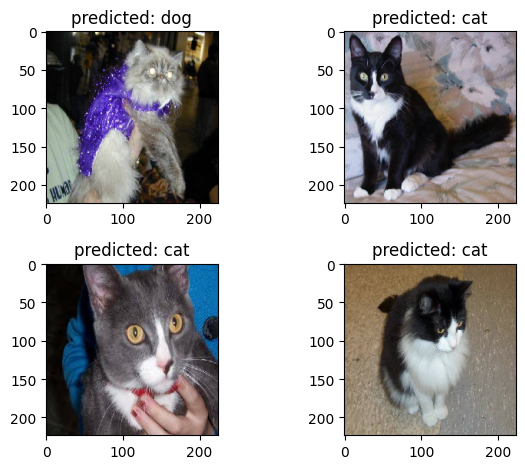

1/1 [==============================] - 0s 216ms/step


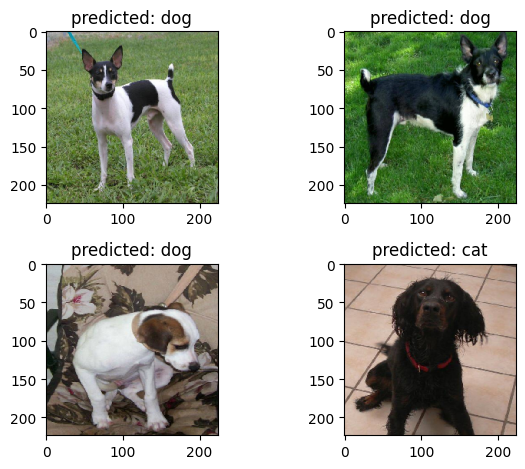

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

img_dir=os.path.join(test_path, 'cats')
fig, ax = plt.subplots(nrows=2, ncols=2)
count = 0
for i, img_curr in enumerate(os.listdir(img_dir)):
    if not i%50 == 0:
        continue
    
    img_path = os.path.join(img_dir, img_curr)
    loaded_image = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(loaded_image)
    img = np.expand_dims(img, axis=0)
    img_array = preprocess_input(img)

    prediction = my_model.predict(img)
    class_index = np.argmax(prediction, axis=-1)

    classes = ['cat', 'dog']
    predicted_label = classes[class_index[0]]

    ax[count//2, count%2].imshow(loaded_image)
    ax[count//2, count%2].set_title(f"predicted: {predicted_label}")

    count += 1

plt.tight_layout()
plt.show()

plt.close()

img_dir=os.path.join(test_path, 'dogs')
fig, ax = plt.subplots(nrows=2, ncols=2)
count = 0
for i, img_curr in enumerate(os.listdir(img_dir)):
    if not i%50 == 0:
        continue
    
    img_path = os.path.join(img_dir, img_curr)
    loaded_image = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(loaded_image)
    img = np.expand_dims(img, axis=0)
    img_array = preprocess_input(img)

    prediction = my_model.predict(img)
    class_index = np.argmax(prediction, axis=-1)

    classes = ['cat', 'dog']
    predicted_label = classes[class_index[0]]

    ax[count//2, count%2].imshow(loaded_image)
    ax[count//2, count%2].set_title(f"predicted: {predicted_label}")

    count += 1

plt.tight_layout()
plt.show()

plt.close()

Most images are thus labeled correctly.